# LEGO DATA ANALYSIS — SETS, THEMES & TRENDS

This notebook explores LEGO datasets (from Rebrickable) to understand how LEGO sets and themes evolved over time, 
which themes dominate, and whether sets have become larger and more complex.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.0f}'.format

<img src="assets/bricks.jpg">

## Colors: How many different LEGO colors exist?

In [2]:
colors = pd.read_csv("data/colors.csv")
print("Unique color names:", colors['name'].nunique())

print("\nTransparent vs Opaque (value_counts):")
print(colors['is_trans'].value_counts())

print("\nTransparent vs Opaque (groupby count):")
print(colors.groupby('is_trans')['name'].count())

Unique color names: 135

Transparent vs Opaque (value_counts):
is_trans
f    107
t     28
Name: count, dtype: int64

Transparent vs Opaque (groupby count):
is_trans
f    107
t     28
Name: name, dtype: int64


### Themes vs Sets
A theme (e.g., Star Wars) contains many individual sets.

<img src="assets/lego_themes.png">
<img src="assets/lego_sets.png">

## Load Sets Data

In [3]:
sets = pd.read_csv("data/sets.csv")
print("Sets shape:", sets.shape)
sets.head()

Sets shape: (15710, 5)


,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


## First LEGO sets released

In [4]:
first_year = sets['year'].min()
first_sets = sets.loc[sets['year'].eq(first_year), ['set_num', 'name', 'year', 'num_parts', 'theme_id']]
print("First year:", first_year)
first_sets.head(20)

First year: 1949


,set_num,name,year,num_parts,theme_id
9521,700.1-1,Extra-Large Gift Set (ABB),1949,142,365
9534,700.2-1,Large Gift Set (ABB),1949,178,365
9539,700.3-1,Medium Gift Set (ABB),1949,142,365
9544,700.A-1,Small Brick Set (ABB),1949,24,371
9545,700.B-1,Small Doors and Windows Set (ABB),1949,12,371


## How many sets in the first year?

In [5]:
sets_in_first_year = (sets['year'] == first_year).sum()
print("Sets sold in first year:", sets_in_first_year)

Sets sold in first year: 5


## Top 5 sets by number of parts

In [6]:
top5_parts = sets.nlargest(5, 'num_parts')[['set_num', 'name', 'num_parts', 'year']]
top5_parts

,set_num,name,num_parts,year
15004,BIGBOX-1,The Ultimate Battle for Chima,9987,2015
11183,75192-1,UCS Millennium Falcon,7541,2017
10551,71043-1,Hogwarts Castle,6020,2018
295,10256-1,Taj Mahal,5923,2017
221,10189-1,Taj Mahal,5922,2008


## Sets released per year

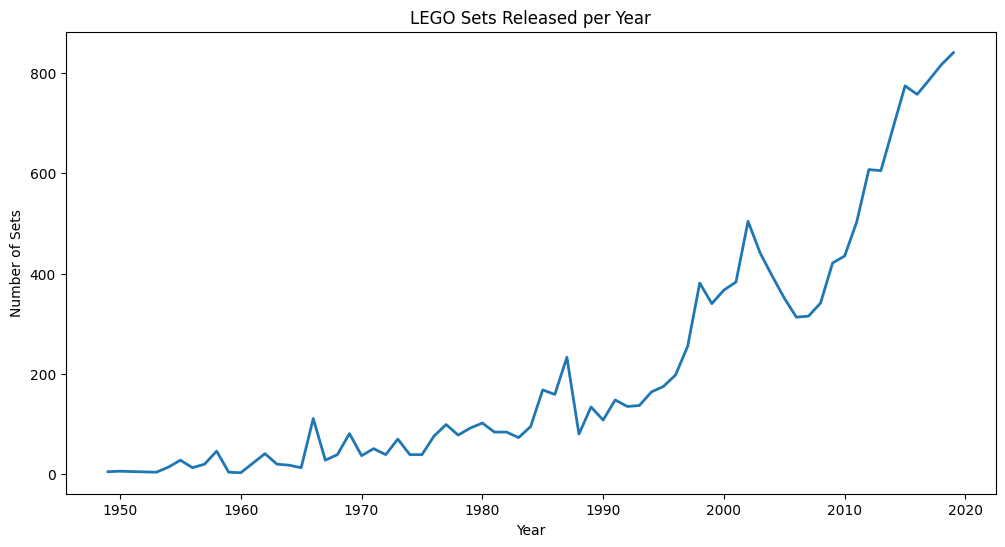

,set_count
year,
1949,5
1950,6
1953,4
1954,14
1955,28


In [7]:
sets_by_year = (sets.groupby('year', as_index=True)
                     .size()
                     .rename('set_count')
                     .to_frame())

trend_years = sets_by_year.index <= 2019

plt.figure(figsize=(12,6))
plt.plot(sets_by_year.index[trend_years], sets_by_year['set_count'][trend_years], linewidth=2)
plt.xlabel('Year'); plt.ylabel('Number of Sets'); plt.title('LEGO Sets Released per Year')
plt.show()

sets_by_year.head()

## Themes released per year

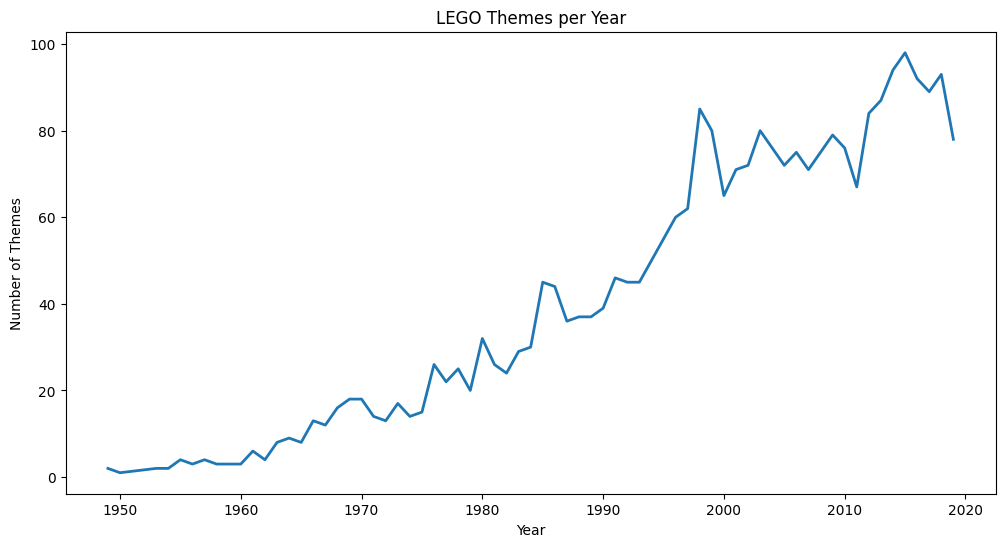

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [8]:
themes_by_year = (sets.groupby('year', as_index=True)['theme_id']
                     .nunique()
                     .rename('nr_themes')
                     .to_frame())

plt.figure(figsize=(12,6))
plt.plot(themes_by_year.index[trend_years], themes_by_year['nr_themes'][trend_years], linewidth=2)
plt.xlabel('Year'); plt.ylabel('Number of Themes'); plt.title('LEGO Themes per Year')
plt.show()

themes_by_year.head()

## Sets vs Themes per year (two axes)

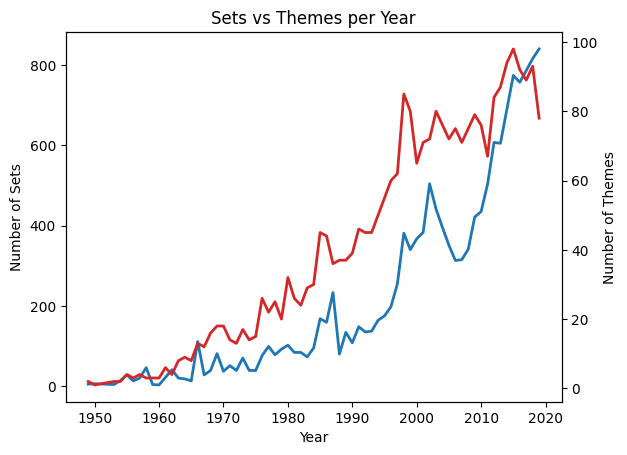

In [9]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(sets_by_year.index[trend_years], sets_by_year['set_count'][trend_years], linewidth=2, label='Sets')
ax2.plot(themes_by_year.index[trend_years], themes_by_year['nr_themes'][trend_years], linewidth=2, color='tab:red', label='Themes')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets')
ax2.set_ylabel('Number of Themes')
plt.title('Sets vs Themes per Year')
plt.show()

## Average number of parts per set (by year)

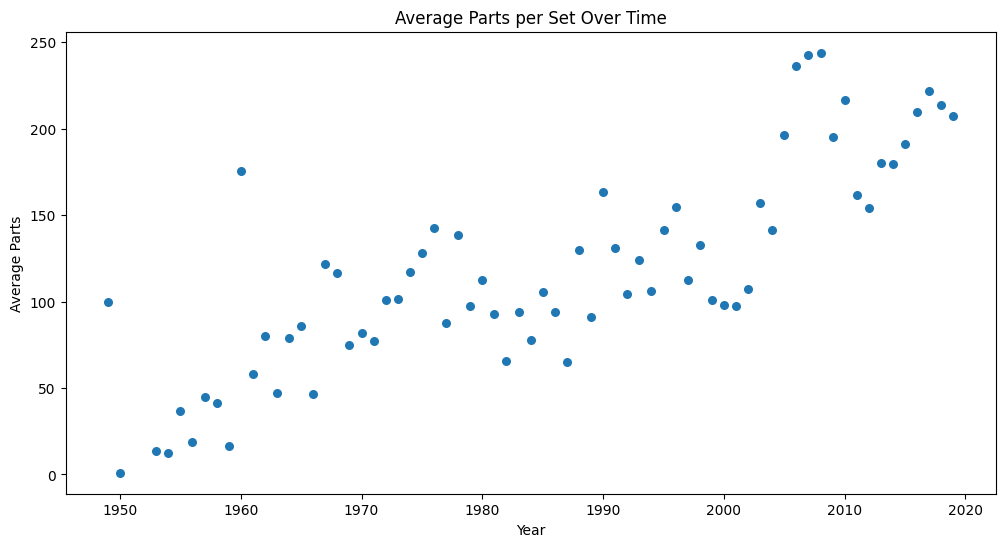

,avg_parts
year,
1949,100
1950,1
1953,14
1954,12
1955,37


In [10]:
parts_per_set = (sets.groupby('year', as_index=True)['num_parts']
                    .mean()
                    .rename('avg_parts')
                    .to_frame())

plt.figure(figsize=(12,6))
plt.scatter(parts_per_set.index[trend_years], parts_per_set['avg_parts'][trend_years], s=30)
plt.xlabel('Year'); plt.ylabel('Average Parts'); plt.title('Average Parts per Set Over Time')
plt.show()

parts_per_set.head()

## Which theme has the most sets?

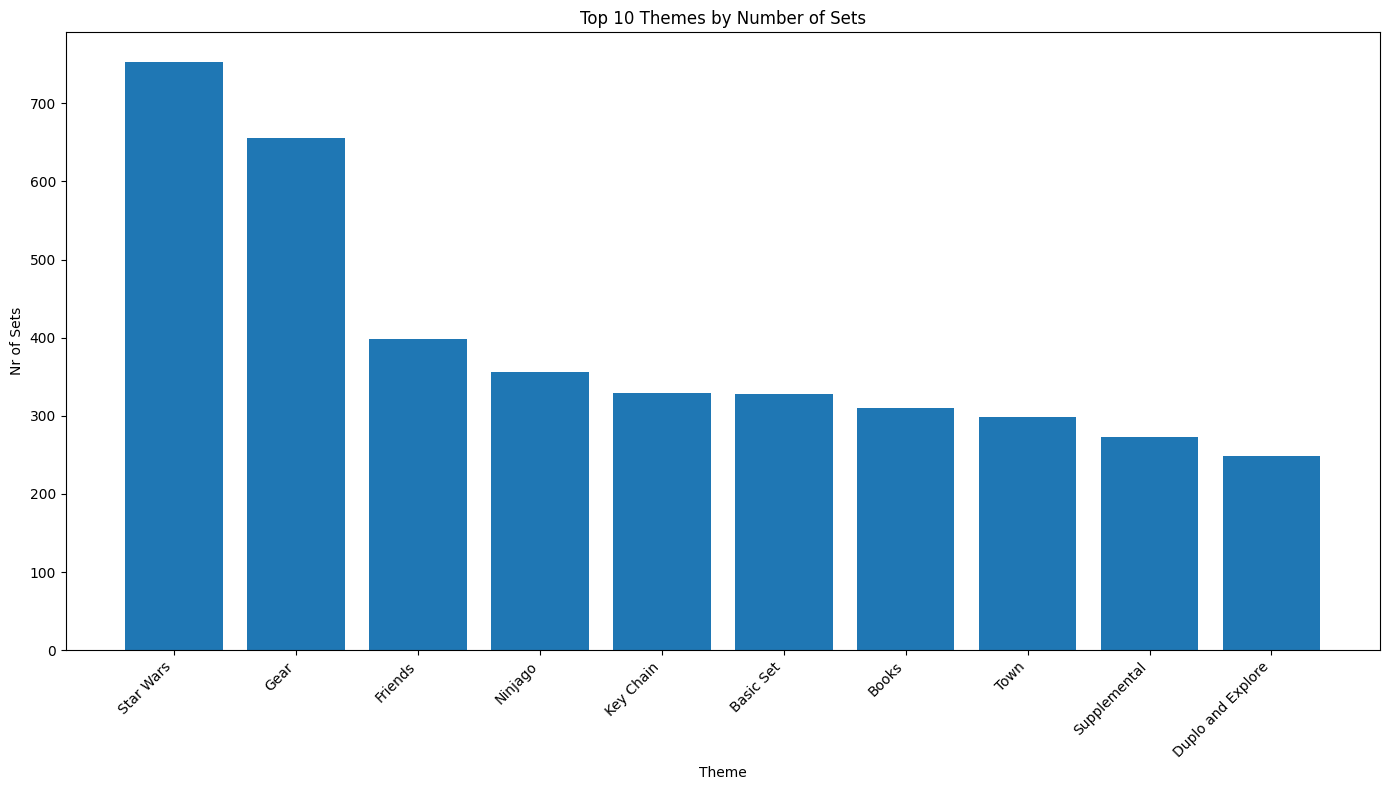

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501
5,505,328,Basic Set,504
6,497,310,Books,NaN
7,632,299,Town,504
8,371,273,Supplemental,365
9,516,248,Duplo and Explore,507


In [11]:
set_theme_count = sets['theme_id'].value_counts()
set_theme_count_df = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count.values})

themes = pd.read_csv('data/themes.csv')
merged_df = pd.merge(set_theme_count_df, themes, on='id', how='left')

top10 = merged_df.sort_values('set_count', ascending=False).head(10)

plt.figure(figsize=(14,8))
plt.bar(top10['name'], top10['set_count'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Nr of Sets'); plt.xlabel('Theme'); plt.title('Top 10 Themes by Number of Sets')
plt.tight_layout()
plt.show()

top10

## Star Wars theme IDs and matching sets (example exploration)

In [12]:
star_wars_themes = themes[themes['name'].str.fullmatch('Star Wars', case=False, na=False)]
star_wars_themes

,id,name,parent_id
17,18,Star Wars,1
150,158,Star Wars,NaN
174,209,Star Wars,207
211,261,Star Wars,258


In [13]:
if not star_wars_themes.empty:
    sw_ids = set(star_wars_themes['id'].tolist())
    sw_sets = sets[sets['theme_id'].isin(sw_ids)]
    sw_sets.head(10)
else:
    print("No 'Star Wars' theme rows found in themes.csv")

## Conclusion
- LEGO expanded both **sets** and **themes** over time, with notable growth in certain eras.
- The **largest sets** (by parts) are easy to identify via `nlargest`.
- The **average parts per set** shows how complexity has changed over time.
- Theme-level analysis reveals which franchises or lines have the **most sets**.
